#Bank Churn prediction
 
### **Context**:

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### **Objective**:

Let us consider you are working as Data scientist with the  bank and you need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### **Data Dictionary**:

The case study is from an open-source dataset from Kaggle.The dataset contains 10,000 sample points with 14 distinct features as follows:

CustomerId: Unique ID which is assigned to each customer

Surname: Last name of the customer
 
CreditScore: It defines the credit history of the customer.
  
Geography: A customer’s location 
   
Gender: It defines the Gender of the customer
   
Age: Age of the customer 
    
Tenure: Number of years for which the customer has been with the bank

NumOfProducts: refers to the number of products that a customer has purchased through the bank.

Balance: Account balance

HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

EstimatedSalary: Estimated salary 

isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

Exited : whether or not the customer left the bank within six month. It can take two values 

0=No ( Customer did not leave the bank )
1=Yes ( Customer left the bank )

## **Please read the instructions carefully before starting the project.** 

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned. 

* Blanks '_______' are provided in the notebook that need to be filled with an appropriate code to get the correct result

* With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space

* Identify the task to be performed correctly and only then proceed to write the required code

* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code"

* Running incomplete code may throw an error

* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors

* Add the results/observations derived from the analysis in the presentation and submit the same in .pdf format

### Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics 
from sklearn import metrics
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
# importing GridSearch CV
from sklearn.model_selection import GridSearchCV

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

### Read the dataset

In [3]:
ds = pd.read_csv("Churn.csv")  # Complete the code to read the dataset 

### Data Overview

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### Displaying the first few rows of the dataset

In [4]:
ds.head() ## Complete the code to display the first 5 rows of the dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Checking the shape of the dataset

In [5]:
ds.shape ## Complete the code to get the shape of data

(10000, 14)

#### Checking the data types of the columns for the dataset

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### Statistical summary of the dataset

In [7]:
ds.describe() ## Complete the code to print the statistical summary of the data

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Checking for duplicate values

In [8]:
ds.duplicated().any() ## Complete the code to check duplicate entries in the data

False

#### Checking for missing values

In [9]:
ds.isna().any() ## Complete the code to check duplicate entries in the data

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [10]:
# creating a copy of the data so that original data remains unchanged
df = ds.copy()

#### Drop the columns which are unique for all users like IDs, names, and rownumbers

In [11]:
# RowNumber , CustomerId and Surname are unique hence drop them
ds = ds.drop(['Surname', 'CustomerId', 'RowNumber'], axis=1)  # complete the code to drop the columns with most unique values

### Exploratory Data Analysis

Here our main interest is to get an understanding as to how the given attributes relate to the 'Exit' status.

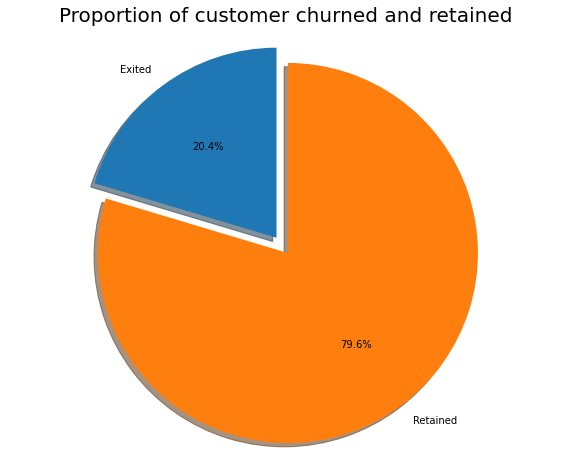

In [12]:
labels = 'Exited', 'Retained'
sizes = [ds.Exited[ds['Exited']==1].count(), ds.Exited[ds['Exited']==0].count()]    ## Complete the code to plot the piechart to observe the proportion of Exited and Retained
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

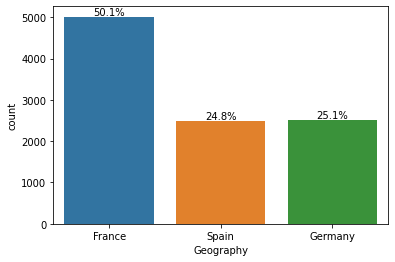

In [115]:

def count_perc(data,feature):
    ax=sns.countplot(data=data,x=feature)
    total = len(ds)
    for p in ax.patches:
        height = p.get_height()
        percentage = height / total * 100
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')
    plt.show()   
count_perc(ds,'Geography')

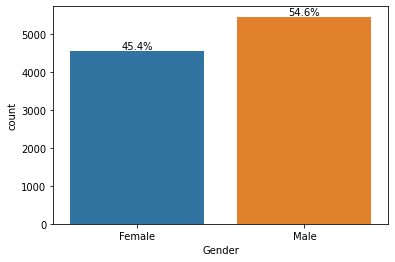

In [116]:

count_perc(ds,'Gender')

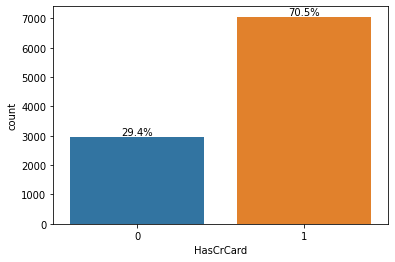

In [117]:

count_perc(ds,'HasCrCard')

###  Target variable Vs Categorical variables
Plot the countplot for Geography, Gender, HasCrCard, and IsActiveMember variables.

<AxesSubplot: xlabel='IsActiveMember', ylabel='count'>

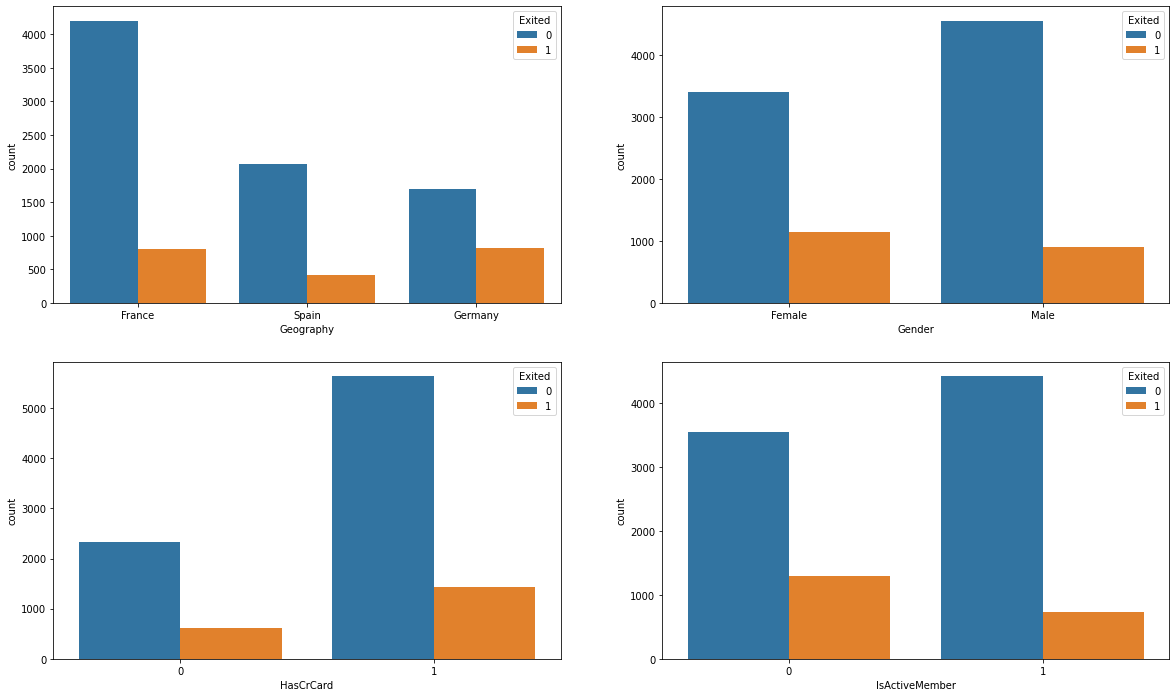

In [13]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = ds, ax=axarr[0][0])  ## Complete the code to plot the countplot for Geography
sns.countplot(x='Gender', hue = 'Exited',data = ds, ax=axarr[0][1])  ## Complete the code to plot the countplot for Gender
sns.countplot(x='HasCrCard', hue = 'Exited',data = ds, ax=axarr[1][0])  ## Complete the code to plot the countplot for HasCrCard
sns.countplot(x='IsActiveMember', hue = 'Exited',data = ds, ax=axarr[1][1])  ## Complete the code to plot the countplot for IsActiveMember

Notes: 
1. geographic order of churn: France, Germany, then Spain
2. women are morelikly to exit the bank than men 
3. customers with higher credit morelickly to exit the bank
4. Cutomers who are considered as Active bank members are lesslikly to exit the bank. 

### Target variable Vs Numerical variables 

In [14]:
ds.select_dtypes('number').columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<AxesSubplot: xlabel='Exited', ylabel='EstimatedSalary'>

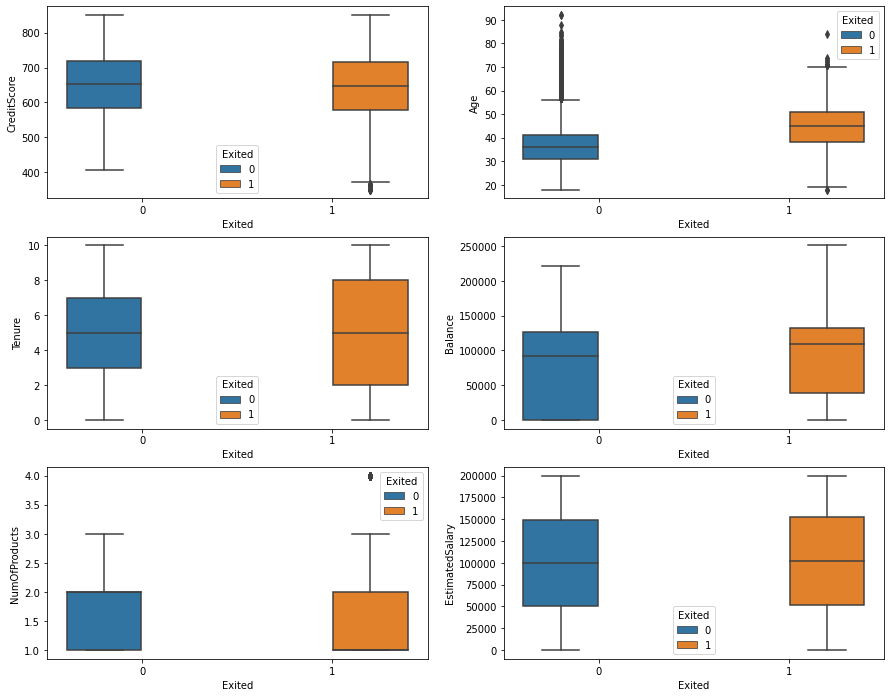

In [15]:
fig, axarr = plt.subplots(3, 2, figsize=(15, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = ds, ax=axarr[0][0])         ## Complete the code to plot the boxplot for Creditscore
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = ds , ax=axarr[0][1])        ## Complete the code to plot the boxplot for Age
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = ds, ax=axarr[1][0])         ## Complete the code to plot the boxplot for Tenure
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = ds, ax=axarr[1][1])         ## Complete the code to plot the boxplot for Balance
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = ds, ax=axarr[2][0])         ## Complete the code to plot the boxplot for NumOfProducts
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = ds, ax=axarr[2][1])         ## Complete the code to plot the boxplot for EstimatedSalary

Notes: 
1. Customers with average ages 44years are morelickly to exite the bank. 
2. Customers with higher balance are mostly will be exited.
3. There is no average differnce regarding tuner however the range are wider for customers who exited.
4. Number of the product and salay do not have clear effect of the bank churn. 

In [16]:
binary_cols = [col for col in df.select_dtypes('number') if df[col].nunique() == 2][:-1]
print(binary_cols)
#value_to_remove='Exited'
df_cont=ds.select_dtypes('number').drop(binary_cols, axis=1)
df_cont.head(2)

['HasCrCard', 'IsActiveMember']


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
0,619,42,2,0.00,1,101348.88,1
1,608,41,1,83807.86,1,112542.58,0


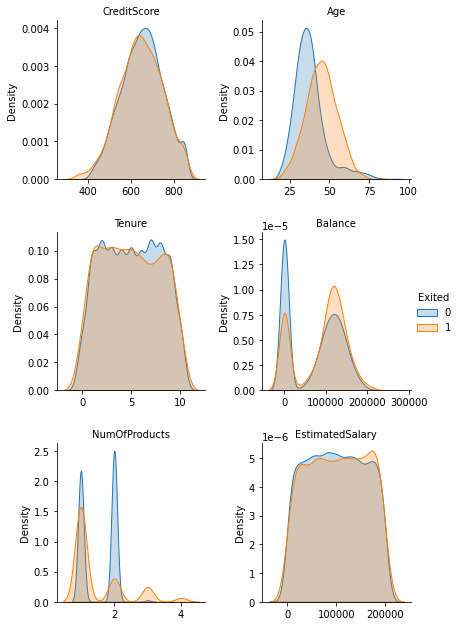

<Figure size 432x288 with 0 Axes>

In [18]:
df = df_cont.melt(df_cont.columns[-1], df_cont.columns[:-1])

fg = sns.FacetGrid(df, col="variable", hue="Exited", col_wrap=2, sharex=False, sharey=False,)
fg.map(sns.kdeplot, 'value', shade=True, label='Data')\
         .add_legend()\
         .set_titles("{col_name}")\
         .set_axis_labels('')
plt.show()

plt.clf()


### Pairplot

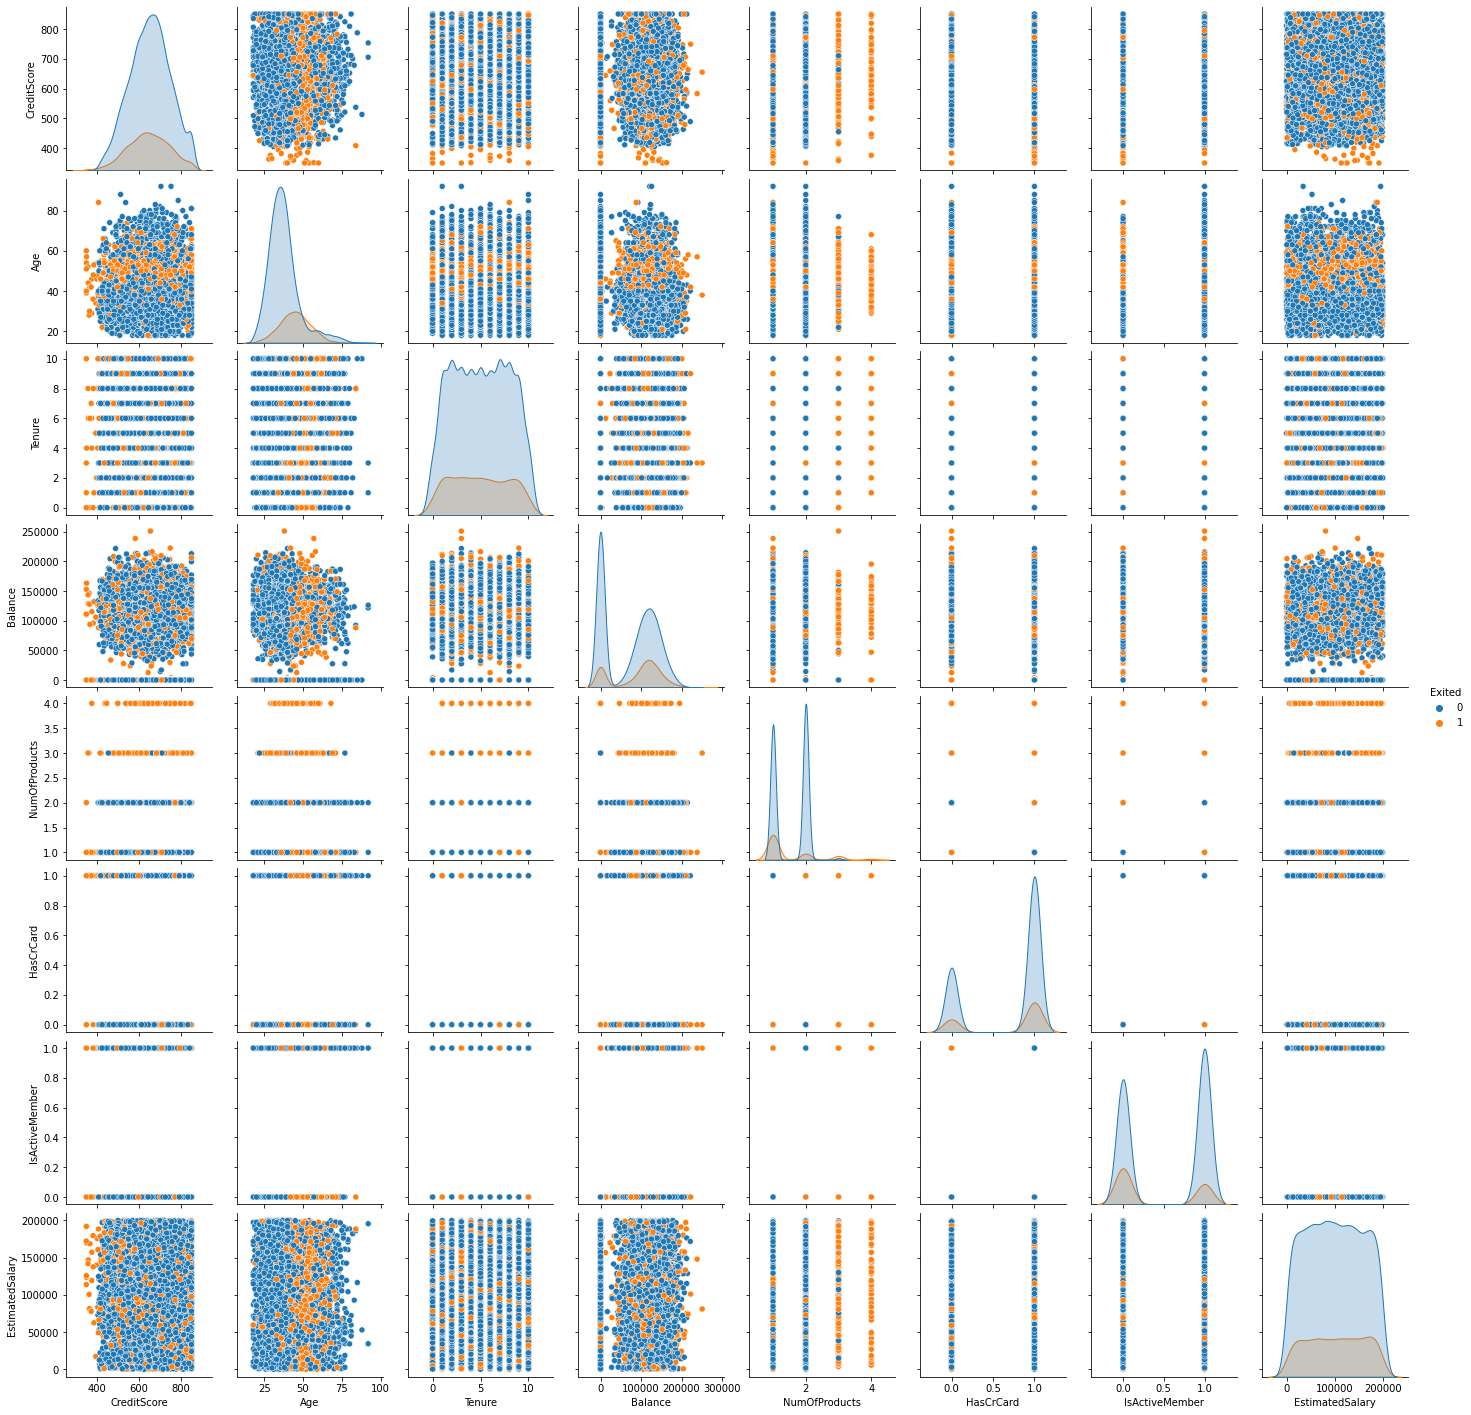

In [19]:
sns.pairplot(ds, diag_kind = 'kde', hue = 'Exited')  
## Complete the code to plot the pairplot on the whole data 'ds'

<AxesSubplot: >

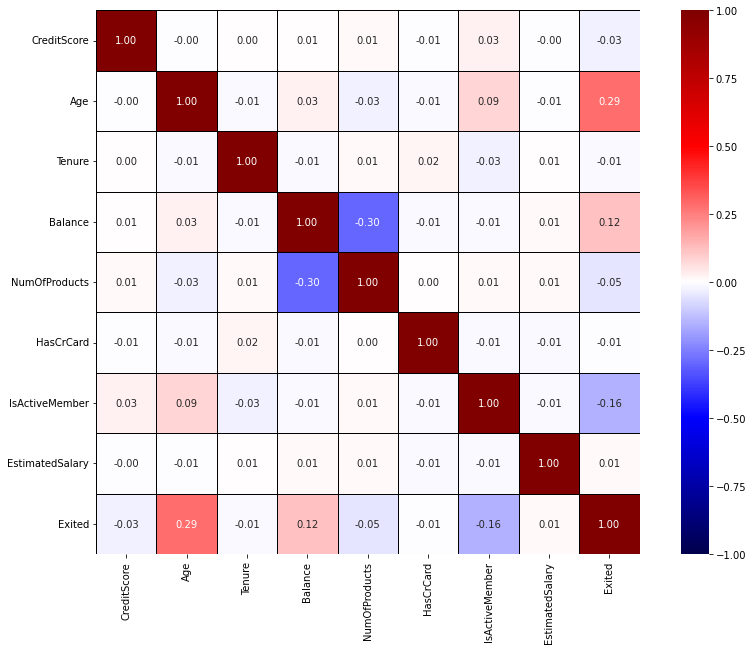

In [20]:
plt.figure(figsize = (15, 10))
sns.heatmap(ds.corr(), annot = True, square=True,fmt = '0.2f',cmap='seismic',vmin=-1,vmax=1,linewidths=1,linecolor='k') ## Complete the code to plot the correlation heatmap on the whole data ds.

## Data Preparation for modeling

- We want to predict the churn.
- Before we proceed to build a model, We'll split the data into train and test to be able to evaluate the model that we build on the train data
-  we'll have to encode categorical features.
- We will build a model using the train data and then check it's performance

#### Distinguish the feature and target set

In [21]:
X = ds.drop(['Exited'],axis=1)    ## Complete the code to obtain the independent features into variable X
y = ds[['Exited']]                ## Complete the code to obtain the dependent features into variable y

In [22]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [23]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


#### Split the data set into Train,Val and test sets

In [24]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True) ## Complete the code to Split the X and y and obtain test set

In [25]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large,y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True) ## complete the code to Split X_large and y_large to obtain train and validation sets

In [26]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6400
Number of rows in validation data = 1600
Number of rows in test data = 2000


#### Categorical Encoding

In [27]:
# Encoding Geography variable
X_train = pd.get_dummies(X_train, columns=["Geography",	"Gender"],drop_first=True) ## Complete the code to encode Geography and Gender in train set
X_test = pd.get_dummies(X_test, columns=["Geography",	"Gender"],drop_first=True)   ## Complete the code to encode Geography and Gender in test set
X_val = pd.get_dummies(X_val, columns=["Geography",	"Gender"],drop_first=True)     ## Complete the code to encode Geography and Gender in validation set

### Scale the train, validation and test data using standardscaler

Since all the numerical values are on a different scale, so we will be scaling all the numerical values to bring them to the same scale. 

In [28]:
## Complete the below code to scale the data using standardscaler
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

In [29]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3006,0.988678,0.572685,-1.384980,0.610704,1,1,0,1.566070,0,0,0
5735,-0.683985,0.477619,-0.355056,-1.237347,2,0,1,0.036348,0,1,0
5652,0.410474,-0.948376,1.361485,-1.237347,2,0,0,1.745403,0,0,0
26,1.081604,-0.282911,-1.041672,0.962063,1,1,1,1.228816,1,0,1
3596,-0.085130,-0.282911,-1.728288,1.144427,1,0,0,-0.764748,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3239,1.143554,-1.899039,0.331561,-1.237347,2,1,0,-0.770604,0,1,0
413,0.431124,0.192420,1.361485,1.679777,3,1,1,1.541056,1,0,0
5787,0.802827,-1.233575,-0.355056,0.326308,2,1,0,-1.052407,1,0,1
860,0.162672,0.382553,1.018177,1.820697,1,1,0,-0.037323,0,0,1


In [30]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(6400, 11)
(1600, 11)
(2000, 11)


## Model evaluation criterion

### Model can make wrong predictions as:
* Predicting a customer is exiting  and the customer  is not exiting
* Predicting a customer is not exiting and  customer is  exiting

### Which case is more important? 
* Predicting that customer is not exiting but he/she is exiting. It might cause loss to the banks because due to wrong identification bank will not be able to take any initiative for those sensitive customers. 

### How to reduce this loss i.e need to reduce False Negative?
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the bank can retain their customers.

## Initialize & Build the model

#### Clearing the backend session and initializing the random seed values

In [31]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [32]:
# Initializing the ANN
classifier = Sequential()
# Complete the code to Add the input layer with 64 neurons with relu as activation function with input of 11 variables
classifier.add(Dense(activation = 'relu', input_dim = 11, units=64))

# Complete the code to add the 1st hidden layer with 32 neurons
classifier.add(Dense(32, activation='relu'))

# Add the output layer with one node and sigmoid activation function
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
classifier.add(Dense(1, activation = 'sigmoid')) 

In [33]:
## Complete the code to Compile the model with SGD optimizer and binary cross entropy as loss with accuracy as metrics
classifier.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
## Complete the code to obtain the summary of the model
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [35]:
## Complete the code to fit the model on train data for 100 epochs 
history=classifier.fit(X_train, y_train,           
          validation_data=(X_val,y_val),
          epochs=100,
          batch_size=32)

Epoch 1/100


200/200 [==============================] - 2s 3ms/step - loss: 0.5214 - accuracy: 0.7875 - val_loss: 0.4830 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4739 - accuracy: 0.7964 - val_loss: 0.4583 - val_accuracy: 0.7969
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4546 - accuracy: 0.7969 - val_loss: 0.4439 - val_accuracy: 0.8019
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.8005 - val_loss: 0.4357 - val_accuracy: 0.8075
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.8034 - val_loss: 0.4306 - val_accuracy: 0.8112
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.8080 - val_loss: 0.4276 - val_accuracy: 0.8150
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4257 - accuracy: 0.8112 - val_loss: 0.4254 - val_accuracy: 0.8144
Epoch 8/100

### Obtaining the train and validation losses

63/63 [==============================] - 0s 2ms/step - loss: 0.3466 - accuracy: 0.8570


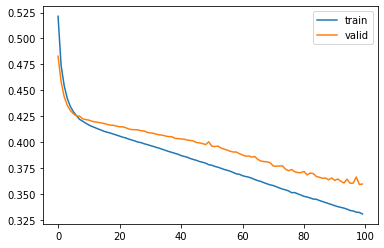

In [36]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

## Complete the code to evaluate the model on X_test and y_test
results = classifier.evaluate(X_test, y_test)

#### Let's Plot confusion matrix 

In [37]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

50/50 [==============================] - 0s 2ms/step


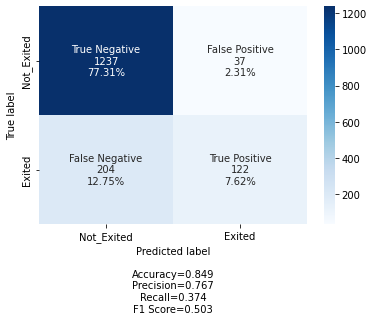

In [38]:
## Complete the code to obtain the prediction on X_val and obtain the confusion matrix 
y_pred1=classifier.predict(X_val)

#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.5)
cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

### Building second model with Adam Optimizer

In [39]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
import random
random.seed(2)
tf.random.set_seed(2)

In [40]:
def create_model():
      ## Initializing the neural network
      model = Sequential()

      ##Complete the code to add the input layer with 64 neurons and relu as activation function
      model.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))

      ## Complete the code to add the first hidden layer with 32 neurons with relu as activation functions
      model.add(Dense(32,activation='relu'))

      ## Complete the code to add the output layer with Sigmoid Activation
      model.add(Dense(1, activation = 'sigmoid'))
      
      ## Complete the code to initialize the model with Adam Optimer
      optimizer = tf.keras.optimizers.Adam(0.001)                                        

      ## Complete the code to compile the model with binary cross entropy as loss function and accuracy as metrics
      model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
      return model

In [41]:
model=create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [42]:
## Complete the code to fit the model on train data  
history = model.fit(X_train,y_train,batch_size=32,validation_data=(X_val,y_val),epochs=100,verbose=1)

Epoch 1/100


200/200 [==============================] - 2s 3ms/step - loss: 0.4512 - accuracy: 0.7998 - val_loss: 0.4334 - val_accuracy: 0.8106
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8283 - val_loss: 0.4177 - val_accuracy: 0.8263
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3970 - accuracy: 0.8327 - val_loss: 0.4077 - val_accuracy: 0.8344
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3865 - accuracy: 0.8356 - val_loss: 0.4027 - val_accuracy: 0.8331
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8403 - val_loss: 0.3967 - val_accuracy: 0.8350
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3660 - accuracy: 0.8473 - val_loss: 0.3878 - val_accuracy: 0.8425
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8481 - val_loss: 0.3799 - val_accuracy: 0.8469
Epoch 8/100

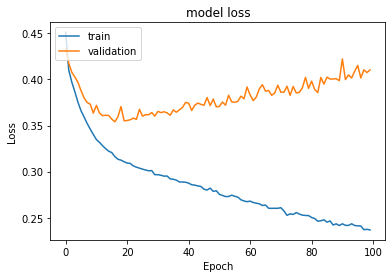

In [43]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [44]:
#Importing classback API
from keras import callbacks 
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

## Complete the code to call the create_model() function
model_e=create_model()

## Complete the code to train the model on X_train and y_train for 100 epochs and also use X_val and y_val as validation_data
history_e = model_e.fit(X_train ,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4674 - accuracy: 0.7867 - val_loss: 0.4273 - val_accuracy: 0.8169
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8238 - val_loss: 0.4140 - val_accuracy: 0.8238
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3972 - accuracy: 0.8342 - val_loss: 0.4032 - val_accuracy: 0.8369
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8386 - val_loss: 0.3953 - val_accuracy: 0.8369
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.8413 - val_loss: 0.3870 - val_accuracy: 0.8394
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3638 - accuracy: 0.8462 - val_loss: 0.3741 - val_accuracy: 0.8481
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3557 - accuracy: 0.8520 - val_loss: 0.3685 - val_accuracy: 0.8444

Lets plot the loss function again

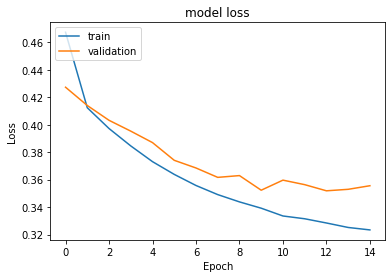

In [45]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_e.history['loss'])
plt.plot(history_e.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Let's tune the threshold using ROC-AUC**


There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = TruePositive / (TruePositive + FalseNegative)


Specificity = TrueNegative / (FalsePositive + TrueNegative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score() and select the threshold with the largest G-Mean value.

200/200 [==============================] - 0s 1ms/step
Best Threshold=0.167119, G-Mean=0.802


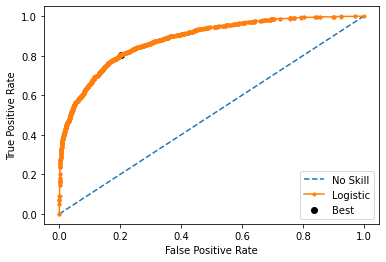

In [46]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat = model_e.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [47]:
#Predicting the results using best as a threshold
y_pred_e=model_e.predict(X_val)
y_pred_e = (y_pred_e > thresholds[ix])
y_pred_e

 1/50 [..............................] - ETA: 1s

50/50 [==============================] - 0s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

Accuracy, Precision, Recall, and F1-Scores

In [48]:
## Complete the code to obtain the classification report Hint: use y_val
cr=metrics.classification_report(y_val,y_pred_e)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1274
           1       0.48      0.77      0.59       326

    accuracy                           0.78      1600
   macro avg       0.70      0.78      0.72      1600
weighted avg       0.84      0.78      0.80      1600



Printing Confusion matrix

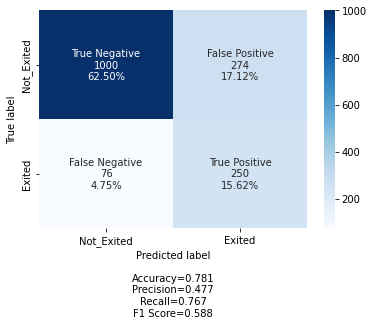

In [49]:
## Complete the code with y_val and y_pred_e to plot the confusion matrix 

cm1=confusion_matrix(y_val, y_pred_e)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

## Building the third Model

In [50]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
import random
random.seed(2)
tf.random.set_seed(2)

In [51]:
#Initializing the neural network
model_3 = Sequential()

#Adding the input layer with 32 neurons and relu as activation function
model_3.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))

# Complete the code to add dropout with dropout_rate= 0.2
model_3.add(Dropout(0.2))

# Adding the first hidden layer with 16 neurons with relu as activation functions
model_3.add(Dense(16,activation='relu'))

# Complete the code to add dropout with dropout_rate= 0.1
model_3.add(Dropout(0.1))
# Adding the second hidden layer with 8 neurons with relu as activation functions
model_3.add(Dense(8,activation='relu'))

# Adding the output layer
model_3.add(Dense(1, activation = 'sigmoid'))

In [52]:
# Summary of the model
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainabl

In [53]:
# Initialize the ANN with Adam optimizer 
optimizer = tf.keras.optimizers.Adam(0.001)

# Complete the code to compile the model with binary cross entropy as loss function and accuracy as metrics
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [54]:
#Fitting the ANN with batch_size = 32 and 100 epochs 
history_3 = model_3.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100


200/200 [==============================] - 2s 4ms/step - loss: 0.5123 - accuracy: 0.7588 - val_loss: 0.4538 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4515 - accuracy: 0.7967 - val_loss: 0.4376 - val_accuracy: 0.7981
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.8025 - val_loss: 0.4335 - val_accuracy: 0.8031
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4310 - accuracy: 0.8073 - val_loss: 0.4329 - val_accuracy: 0.8087
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.8066 - val_loss: 0.4276 - val_accuracy: 0.8131
Epoch 6/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4300 - accuracy: 0.8119 - val_loss: 0.4229 - val_accuracy: 0.8200
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4240 - accuracy: 0.8197 - val_loss: 0.4189 - val_accuracy: 0.8200
Epoch 8/100

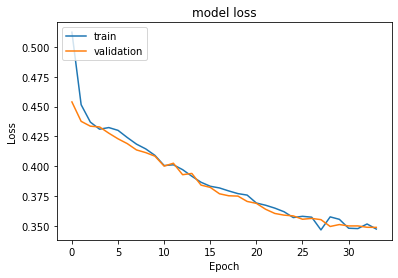

In [55]:
# Complete the code to plot the Train Loss and Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

200/200 [==============================] - 0s 1ms/step
Best Threshold=0.220600, G-Mean=0.793


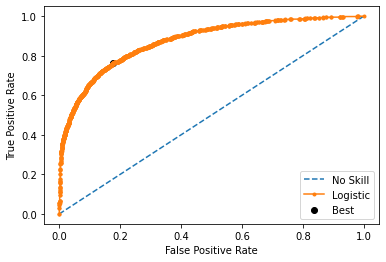

In [56]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat = model_3.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [57]:
#Predicting the results using best as a threshold
y_pred_e=model_3.predict(X_val)
y_pred_3 = (y_pred_e > thresholds[ix])
y_pred_3

 1/50 [..............................] - ETA: 1s

50/50 [==============================] - 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [58]:
# Complete the code to obtain the classification report
cr=metrics.classification_report(y_val,y_pred_3)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1274
           1       0.51      0.75      0.61       326

    accuracy                           0.81      1600
   macro avg       0.72      0.78      0.74      1600
weighted avg       0.84      0.81      0.82      1600



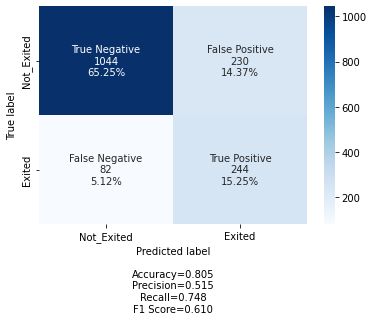

In [59]:
# Complete the code to obtain the confusion matrix

cm1=confusion_matrix(y_val, y_pred_3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

#### Hyperparameter Optimization

Some important parameters to look out for while optimizing neural networks are:

-Type of architecture

-Number of Layers

-Number of Neurons in a layer

-Regularization parameters

-Learning Rate

-Type of optimization / backpropagation technique to use

-Dropout rate

-Weight sharing

### Building a model and tuning it using hyperparameter tuning

In [60]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
import random
random.seed(2)
tf.random.set_seed(2)

In [61]:
def create_model_v2(dropout_rate=0.1,learning_rate=0.001,layer_1=64,layer_2=32):  
    np.random.seed(1337)

    #Initializing the neural network
    model = Sequential()

    # This adds the input layer (by specifying input dimension)
    model.add(Dense(layer_1,activation='relu',input_dim = X_train.shape[1]))

    ## Complete the code by adding dropout with dropout rate=0.5
    model.add(Dropout(0.5))

    # # Adding the hidden layer
    # Notice that we do not need to specify input dim. 
    model.add(Dense(layer_2,activation='relu'))

    # # Adding the output layer
    # Notice that we do not need to specify input dim. 
    # we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
    # We use the sigmoid because we want probability outcomes
    model.add(Dense(1, activation='sigmoid'))

    # Adding Adam initializer
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    ## Complete the code to compile the model using binary_crossentropy as loss
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate),loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

##### Using Grid search

We are using grid search to optimize two hyperparameters called **batch size, epochs** due to the limited time. But you can optimize the other hyperparameters as mentioned above

In [62]:
## Complete the code by calling the creat_model_v2 function in KerasClassifier
keras_estimator = KerasClassifier(build_fn=create_model_v2, verbose=1)

In [63]:
# define the grid search parameters
param_grid = {
    'batch_size':[40, 64, 128],
    'learning_rate':[0.01,0.001,0.1]}


kfold_splits = 3
# Complete the code by using the the defined keras_estimator as estimator.
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [64]:
## Complete the code to fit the model on train data and use x_val and y_val as validation data
grid_result = grid.fit(X_train, y_train,validation_data = (X_val,y_val),verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# Printing mean 
means = grid_result.cv_results_['mean_test_score']
# Printing standard deviation
stds = grid_result.cv_results_['std_test_score']
# Printing best parameters
params = grid_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits


160/160 [==============================] - 2s 4ms/step - loss: 0.4548 - accuracy: 0.8034 - val_loss: 0.4318 - val_accuracy: 0.8150
Best: 0.809686 using {'batch_size': 40, 'learning_rate': 0.01}


##Let's create the final model with the obtained configuration after hyperparameter tuning

In [65]:
# Creating the model
estimator_v2=create_model_v2(learning_rate=grid_result.best_params_['learning_rate'])
# Printing model summary
estimator_v2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [66]:
## Complete the code to fit the model on train data abd train the model with best batch_size obtained from hyperparameter tuning
history_h=estimator_v2.fit(X_train, y_train, epochs=100, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_data=(X_val,y_val))

Epoch 1/100


160/160 [==============================] - 2s 4ms/step - loss: 0.4525 - accuracy: 0.8006 - val_loss: 0.4373 - val_accuracy: 0.8119
Epoch 2/100
160/160 [==============================] - 1s 3ms/step - loss: 0.4271 - accuracy: 0.8203 - val_loss: 0.4170 - val_accuracy: 0.8275
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.8269 - val_loss: 0.4137 - val_accuracy: 0.8213
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8280 - val_loss: 0.4142 - val_accuracy: 0.8344
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.8313 - val_loss: 0.3877 - val_accuracy: 0.8313
Epoch 6/100
160/160 [==============================] - 0s 3ms/step - loss: 0.3968 - accuracy: 0.8352 - val_loss: 0.3856 - val_accuracy: 0.8388
Epoch 7/100
160/160 [==============================] - 1s 4ms/step - loss: 0.3904 - accuracy: 0.8398 - val_loss: 0.3779 - val_accuracy: 0.8394
Epoch 8/100

Plotting the validation and training loss

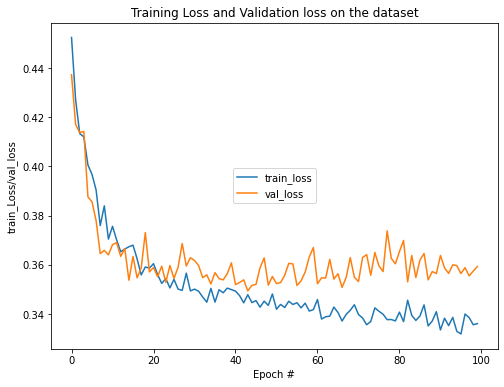

In [67]:
N =100
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history_h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history_h.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="center")
plt.show()

##### Tuning the threshold

200/200 [==============================] - 1s 2ms/step
Best Threshold=0.225191, G-Mean=0.811


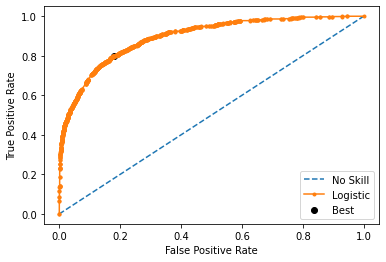

In [68]:
# predict probabilities
yhat = estimator_v2.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

#### Predict the results using  the best  threshold

In [69]:
# Complete the code to obtain the predictions on X_val
y_pred_h = estimator_v2.predict(X_val)
print(y_pred_h)

 1/50 [..............................] - ETA: 1s

50/50 [==============================] - 0s 4ms/step
[[0.16985577]
 [0.00472375]
 [0.03019872]
 ...
 [0.23357862]
 [0.5101841 ]
 [0.56679267]]


In [70]:
# To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false. 
# So we will use the best cutoff value  to indicate whether they are likely to exit or not.
y_pred_h = (y_pred_h > thresholds[ix])
print(y_pred_h)

[[False]
 [False]
 [False]
 ...
 [ True]
 [ True]
 [ True]]


In [71]:
# Complete the code to obtain the classification report
from sklearn import metrics
cr=metrics.classification_report(y_val,y_pred_h)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.80      0.85      1274
           1       0.47      0.71      0.57       326

    accuracy                           0.78      1600
   macro avg       0.70      0.76      0.71      1600
weighted avg       0.83      0.78      0.80      1600



#### Print the  confusion matrix

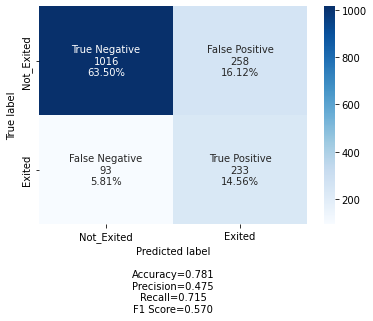

In [72]:
## Complete the code to obtain the confusion matrix
cm_h=confusion_matrix(y_val, y_pred_h)

labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Now try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [73]:
## Complete the code to apply SMOTE on train data
from imblearn.over_sampling import SMOTE
sm  = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train) 
print('After UpSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('After UpSampling, the shape of train_y: {} \n'.format(y_train.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192, 1) 



<AxesSubplot: xlabel='Exited', ylabel='count'>

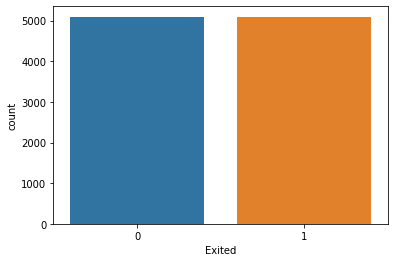

In [74]:
sns.countplot(y_train['Exited'])

## Build a model with Balanced Dataset

In [75]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
import random
random.seed(2)
tf.random.set_seed(2)

In [76]:
## Complete the code to initilaize a sequential model
model_4 = Sequential()

# Complete the code to add a input layer of 32 neurons with relu as activation function 
model_4.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))

# Complete the code to add dropout with dropout rate=0.2
model_4.add(Dropout(0.2))
# Adding hidden layer with 16 neurons with relu as activation function
model_4.add(Dense(16,activation='relu'))

# Adding the dropout
model_4.add(Dropout(0.1))

## Complete the code to add dense layers with 8 neurons
model_4.add(Dense(8,activation='relu'))

# Complete the code to add suitable activation function in the final layer
model_4.add(Dense(1, activation = 'sigmoid'))

In [77]:
## Complete the code to obtain the summary of the model
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainabl

In [78]:
# Complete the code to define earlystopping as callback
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

# Initializing Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Complining the model with binary cross entropy as loss and accuracy as metrics
model_4.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])

# Complete the code to fit the model on train with batch_size of 64, epochs of 100 and callbacks as earlystopping
history_4 = model_4.fit(X_train,y_train,batch_size=64,epochs=100,verbose=1,validation_data = (X_val,y_val),callbacks=[es_cb])

Epoch 1/100


160/160 [==============================] - 3s 7ms/step - loss: 0.6432 - accuracy: 0.6333 - val_loss: 0.5592 - val_accuracy: 0.7262
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.7093 - val_loss: 0.5494 - val_accuracy: 0.7312
Epoch 3/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5575 - accuracy: 0.7249 - val_loss: 0.5267 - val_accuracy: 0.7362
Epoch 4/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5484 - accuracy: 0.7318 - val_loss: 0.5455 - val_accuracy: 0.7200
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5414 - accuracy: 0.7326 - val_loss: 0.5335 - val_accuracy: 0.7256
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5313 - accuracy: 0.7354 - val_loss: 0.5341 - val_accuracy: 0.7294
Epoch 7/100
160/160 [==============================] - 0s 3ms/step - loss: 0.5199 - accuracy: 0.7437 - val_loss: 0.5129 - val_accuracy: 0.7375
Epoch 8/100

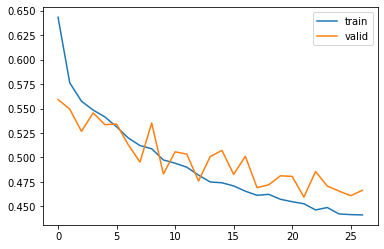

In [79]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_4.history)
hist['epoch'] = history_4.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

### Finding the optimal  threshold

319/319 [==============================] - 1s 1ms/step
Best Threshold=0.522367, G-Mean=0.820


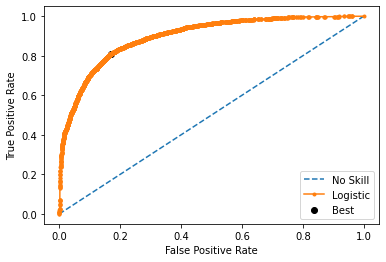

In [80]:
## Complete the code to find the optimal threshold using X_train
yhat = model_4.predict(X_train)

# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [81]:
## Complete the code to obtain the predictions on X_val
y_pred_s = model_4.predict(X_val)
#Predicting the results using tuned threshold
y_pred_s = (y_pred_s >thresholds[ix])
y_pred_s

50/50 [==============================] - 0s 4ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [82]:
from sklearn import metrics
cr=metrics.classification_report(y_val,y_pred_s)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1274
           1       0.48      0.68      0.57       326

    accuracy                           0.79      1600
   macro avg       0.70      0.75      0.71      1600
weighted avg       0.82      0.79      0.80      1600



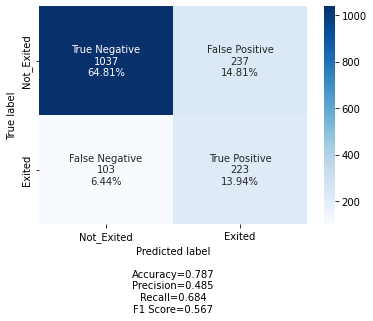

In [83]:
#Calculating the confusion matrix 
cm_s=confusion_matrix(y_val, y_pred_s)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_s, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

## Tuning the model using Hyperparameter tuning

In [84]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
import random
random.seed(2)
tf.random.set_seed(2)

In [85]:
def create_model_v2(dropout_rate=0.1,lr=0.001,layer_1=32,layer_2=16,layer_3=8):  
    np.random.seed(1337)
    model = Sequential()
    # This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
    model.add(Dense(layer_1,activation='relu',input_dim = X_train.shape[1]))
    #Lets use dropout to prevent the overfitting 
    model.add(Dropout(dropout_rate))
    # # Adding the hidden layer
    # Notice that we do not need to specify input dim. 
    model.add(Dense(layer_2,activation='relu'))
    # Adding dropout layer to prevent the overfitting
    model.add(Dropout(dropout_rate))
    model.add(Dense(layer_3,activation='relu'))
    # # Adding the output layer
    # Notice that we do not need to specify input dim. 
    # we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
    # We use the sigmoid because we want probability outcomes
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

##Using Grid search

We are using grid search to optimize three hyperparameters called
 **drop_out rate, batch size, epochs** due to the limited time. But you can optimize the other hyperparameters as mentioned above

In [86]:
## Complete the code to tune the model using KerasClassifier
keras_estimator = KerasClassifier(build_fn=create_model_v2, verbose=1)

In [87]:
# define the grid search parameters
param_grid = {
    'batch_size':[40, 64, 128],
    "lr":[0.01,0.001,0.1],
    "dropout_rate":[0.1,0.2,0.3],   
}

kfold_splits = 3

## Complete the code to define the param_grid and number of k-fold splits
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [88]:
## Fit the model on X_train and y_train
grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Fitting 3 folds for each of 27 candidates, totalling 81 fits


204/204 [==============================] - 2s 4ms/step - loss: 0.5554 - accuracy: 0.7180 - val_loss: 0.6881 - val_accuracy: 0.6184
Best: 0.580446 using {'batch_size': 40, 'dropout_rate': 0.1, 'lr': 0.01}


##Let's create the final model with above mentioned configuration

In [89]:
## Complete the code to define the dropout_rate and learning_rate with the best rate values obtained after tunning 
estimator_v2=create_model_v2(dropout_rate=grid_result.best_params_['dropout_rate'],lr=grid_result.best_params_['lr'])
estimator_v2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                384       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-traina

In [90]:
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=25)
history_h=estimator_v2.fit(X_train, y_train, epochs=100, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/100


204/204 [==============================] - 2s 4ms/step - loss: 0.5607 - accuracy: 0.7078 - val_loss: 0.6838 - val_accuracy: 0.5866
Epoch 2/100
204/204 [==============================] - 0s 2ms/step - loss: 0.4971 - accuracy: 0.7567 - val_loss: 0.6448 - val_accuracy: 0.5380
Epoch 3/100
204/204 [==============================] - 1s 3ms/step - loss: 0.4812 - accuracy: 0.7679 - val_loss: 0.6887 - val_accuracy: 0.5782
Epoch 4/100
204/204 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.7787 - val_loss: 0.5261 - val_accuracy: 0.6861
Epoch 5/100
204/204 [==============================] - 1s 3ms/step - loss: 0.4476 - accuracy: 0.7904 - val_loss: 0.6132 - val_accuracy: 0.6130
Epoch 6/100
204/204 [==============================] - 1s 4ms/step - loss: 0.4398 - accuracy: 0.7916 - val_loss: 0.5883 - val_accuracy: 0.6596
Epoch 7/100
204/204 [==============================] - 1s 3ms/step - loss: 0.4267 - accuracy: 0.8026 - val_loss: 0.5471 - val_accuracy: 0.6969
Epoch 8/100

Plotting the validation and training loss

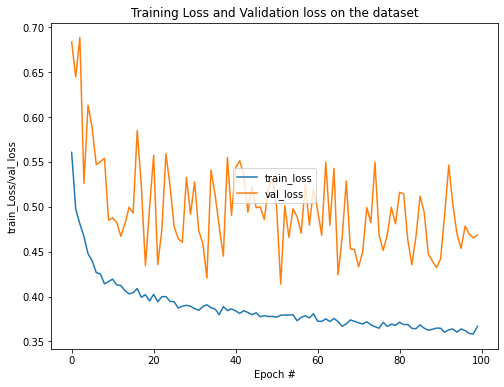

In [91]:
N =100
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history_h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history_h.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="center")
plt.show()

### Finding the optimal threshold 

319/319 [==============================] - 1s 1ms/step
Best Threshold=0.369747, G-Mean=0.855


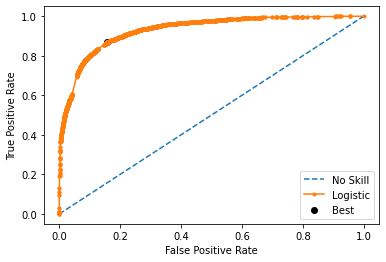

In [92]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat = estimator_v2.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

#### Predict the results using best threshold 

In [93]:
y_pred_h = estimator_v2.predict(X_val)
y_pred_h = (y_pred_h > thresholds[ix])
print(y_pred_h)

50/50 [==============================] - 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [False]
 [ True]
 [ True]]


#### Print the confusion matrix

In [94]:
## Complete the code to obtain the classification report on y_val and the predicted values
from sklearn import metrics
cr=metrics.classification_report(y_val,y_pred_h)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.80      0.85      1274
           1       0.48      0.72      0.57       326

    accuracy                           0.78      1600
   macro avg       0.70      0.76      0.71      1600
weighted avg       0.83      0.78      0.80      1600



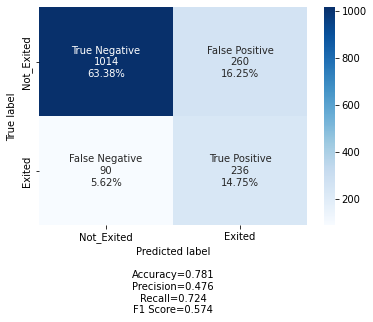

In [95]:
# Complete the code to obtain the confusion matrix 
cm_h=confusion_matrix(y_val, y_pred_h)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

## Predict the test data X_test using the best model built among

319/319 [==============================] - 1s 2ms/step
Best Threshold=0.191832, G-Mean=0.814


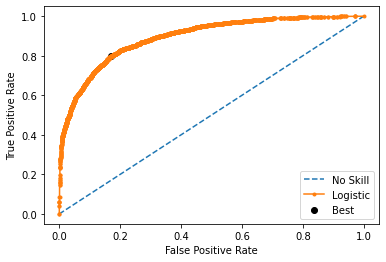

In [96]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities using the best model
yhat = model_e.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [125]:
# Complete the code to Predict the X_test data using the best model
y_pred_test = model_e.predict(X_test)
y_pred_test = (y_pred_test > thresholds[ix])
print(y_pred_test)

63/63 [==============================] - 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [126]:
## Complete the code to obtain the classification report on y_test and the predicted values
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1593
           1       0.50      0.75      0.60       407

    accuracy                           0.80      2000
   macro avg       0.72      0.78      0.73      2000
weighted avg       0.84      0.80      0.81      2000



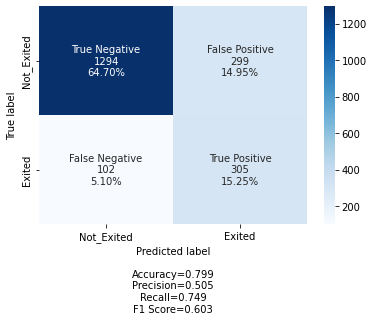

In [127]:
# Complete the code to obtain the confusion matrix 
cm_h=confusion_matrix(y_test,y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
ee=make_confusion_matrix(cm_h, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [128]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_classification_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    metrics_df = pd.DataFrame({'Accuracy': [accuracy], 'Precision': [precision], 'Recall': [recall], 'F1 Score': [f1]})
    return metrics_df
calculate_classification_metrics(y_test,y_pred_test)

,Accuracy,Precision,Recall,F1 Score
0,0.7995,0.504967,0.749386,0.603363


## **Conclusion:**


*   



We encourage the learners to further look for optimizing the model and come up with better results.

#### Happy Learning!

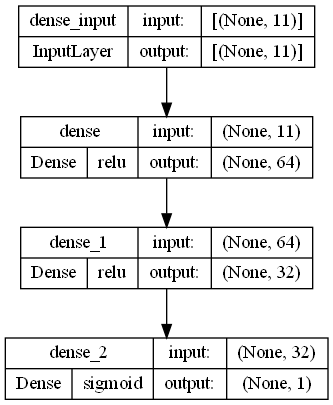

In [129]:
tf.keras.utils.plot_model(
classifier,
to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)